In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import json
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgi

In [6]:
H = xgi.read_hif("data/deidentified_starterpack_hif.json")

In [4]:
H.num_nodes, H.num_edges

(1671681, 301322)

In [ ]:
cc = [len(c) for c in xgi.connected_components(H)]
component_sizes, component_numbers = np.unique(cc, return_counts=True)

creation_dates = [
    datetime.strptime(date, "%Y-%m-%d")
    for date in H.edges.attrs("date-created").aslist()
]
edge_sizes = H.edges.size.asnumpy()

Text(0, 0.5, 'Number of components')

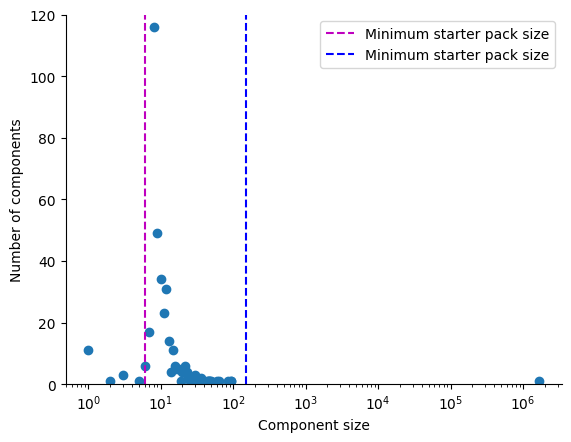

In [ ]:
plt.scatter(component_sizes, component_numbers)
plt.xscale("log")
plt.plot([6, 6], [0, 120], "m--", label="Minimum starter pack size")
plt.plot([150, 150], [0, 120], "b--", label="Minimum starter pack size")
sns.despine()
plt.legend()
plt.ylim([0, 120])
plt.xlabel("Component size")
plt.ylabel("Number of components")

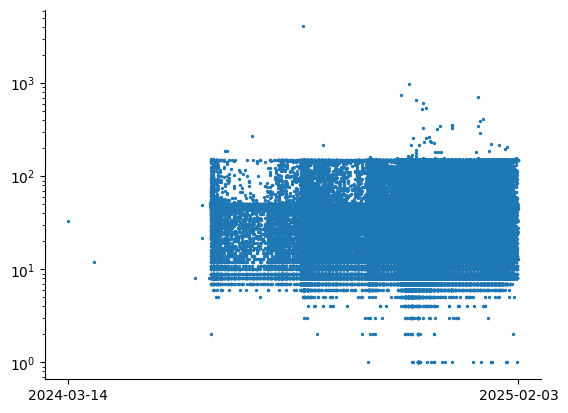

In [ ]:
plt.scatter(creation_dates, edge_sizes, s=2)
plt.yscale("log")
plt.xticks(
    [min(creation_dates), max(creation_dates)],
    [min(creation_dates).date(), max(creation_dates).date()],
)
sns.despine()

In [17]:
H.edges.size.unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

Text(0, 0.5, 'Number of components')

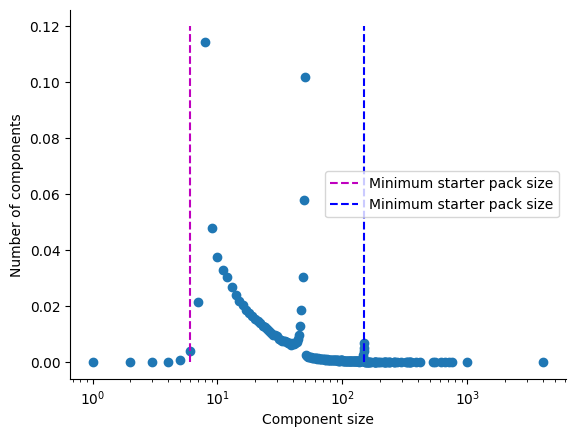

In [23]:
s, n = H.edges.size.unique(return_counts=True)
plt.scatter(s, n / n.sum())
plt.xscale("log")
plt.plot([6, 6], [0, 0.12], "m--", label="Minimum starter pack size")
plt.plot([150, 150], [0, 0.12], "b--", label="Minimum starter pack size")
sns.despine()
plt.legend()
# plt.ylim([0, 120])
plt.xlabel("Component size")
plt.ylabel("Number of components")

In [5]:
## stats about starter pack sizes
print(f"Min starter pack size is ", H.edges.size.min())
print(f"Max starter pack size is ", H.edges.size.max())
print(f"Mean starter pack size is ", H.edges.size.mean())
print(f"Median starter pack size is ", H.edges.size.median())
print(f"The mode of the starter pack size is ", H.edges.size.mode())

Min starter pack size is  0
Max starter pack size is  4070
Mean starter pack size is  32.862223800452675
Median starter pack size is  24.0
The mode of the starter pack size is  8


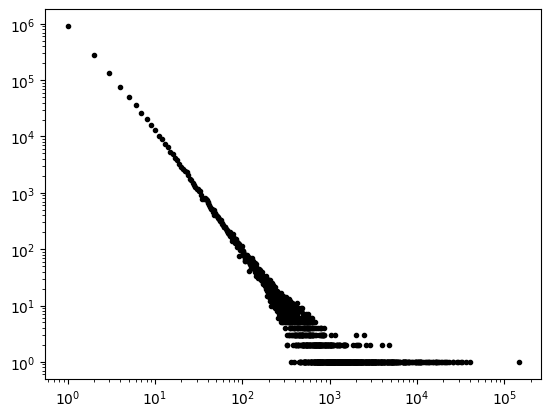

In [26]:
k, n = H.nodes.degree.unique(return_counts=True)
plt.loglog(k, n, "k.")

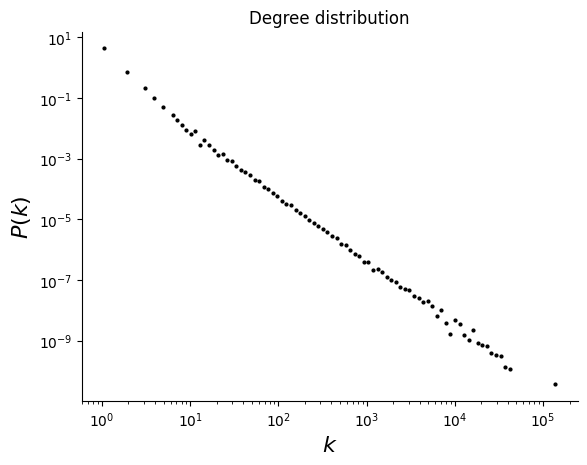

In [12]:
h1 = H.nodes.degree.ashist(bins=100, density=True, log_binning=True)
plt.loglog(h1["bin_center"], h1["value"], "ko", markersize=2)
plt.title("Degree distribution")
plt.xlabel(r"$k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
sns.despine()

# size distribution (starterpack size)
# degree distribution
# clique equivalent (s-connection???)
# how to know if there are people that often appear in the same starterpacks
# transitivity
# creator -> members (if i am in a starterpack that you created and if you create a starter pack)

starter pack a (creator i) -> member j, starterpack b (creator j) -> member k ??? starterpack c (creator i) -> member k

clustering coefficient??
simpliciality?? -> e \in E, e_j \subset e_i

